# Install Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -U -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
!pip install -q roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 43.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.


# Imports

In [ ]:
from roboflow import Roboflow

%cd yolov5
from utils.downloads import attempt_download

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5


# Download & Load Dataset

In [ ]:
rf = Roboflow(api_key="BbnmsuVxIX7JOCyUh2Vj")
project = rf.workspace("plant-disease-detection-e6htb").project("plant-disease-detection-rhmhk")
version = project.version(1)
dataset = version.download("folder")

!mv /content/yolov5/Plant-Disease-Detection-1/valid /content/yolov5/Plant-Disease-Detection-1/val

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plant-Disease-Detection-1 in folder:: 100%|██████████| 6164/6164 [00:02<00:00, 2159.65it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fmapQZYONqB4UGjBh6VD")
project = rf.workspace("kkk-en19u").project("green-0vcko")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to green-1 in yolov5pytorch:: 100%|██████████| 1042/1042 [00:00<00:00, 9388.43it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fmapQZYONqB4UGjBh6VD")
project = rf.workspace("test-datasets").project("random-test-v3")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to random-test-v3-1 in yolov5pytorch:: 100%|██████████| 709/709 [00:00<00:00, 4406.96it/s]


In [ ]:
!mkdir -p /content/yolov5/Plant-Disease-Detection-1/train/not_leaf
!mkdir -p /content/yolov5/Plant-Disease-Detection-1/val/not_leaf

!cp /content/yolov5/random-test-v3-1/train/images/* /content/yolov5/Plant-Disease-Detection-1/train/not_leaf/
!cp /content/yolov5/random-test-v3-1/valid/images/* /content/yolov5/Plant-Disease-Detection-1/val/not_leaf/


In [ ]:
!mkdir -p /content/yolov5/Plant-Disease-Detection-1/train/not_leaf
!mkdir -p /content/yolov5/Plant-Disease-Detection-1/val/not_leaf

!cp /content/yolov5/green-1/train/images/* /content/yolov5/Plant-Disease-Detection-1/train/not_leaf/
!cp /content/yolov5/green-1/valid/images/* /content/yolov5/Plant-Disease-Detection-1/val/not_leaf/


# Download YOLOv5 pretrained weights
Model weights are available in 5 sizes

- n -> nano
- s -> small
- m -> medium
- l -> large
- x -> extra large

Larger size means deeper neural network, more parameters and better accuracy. At the same time, model will take more space while fine-tuning and inferencing.

In [ ]:
sizes = ['n', 's', 'm', 'l', 'x']
cls = [f'{x}-cls' for x in sizes]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 4.87M/4.87M [00:00<00:00, 83.0MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 90.0MB/s]

100%|██████████| 24.9M/24.9M [00:00<00:00, 60.7MB/s]

100%|██████████| 50.9M/50.9M [00:01<00:00, 47.1MB/s]

100%|██████████| 92.0M/92.0M [00:02<00:00, 44.0MB/s]



In [ ]:
MODEL = "yolov5x-cls.pt"
DATA_PATH = "/content/yolov5/Plant-Disease-Detection-1"
EPOCHS = 50
BATCH_SIZE = 128
PRETRAINED_WEIGHTS = "weights/yolov5x-cls.pt"

In [ ]:
!python classify/train.py \
  --model {MODEL} \
  --data {DATA_PATH} \
  --epochs {EPOCHS} \
  --img {BATCH_SIZE} \
  --pretrained {PRETRAINED_WEIGHTS} \
  --device 0

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-15 09:01:47.514589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747299707.534645    8292 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747299707.540591    8292 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
classify/train: model=yolov5x-cls.pt, data=/content/yolov5/Plant-Disease-

# Visualisation
If necessary, check the results folder for metrics and evaluations.

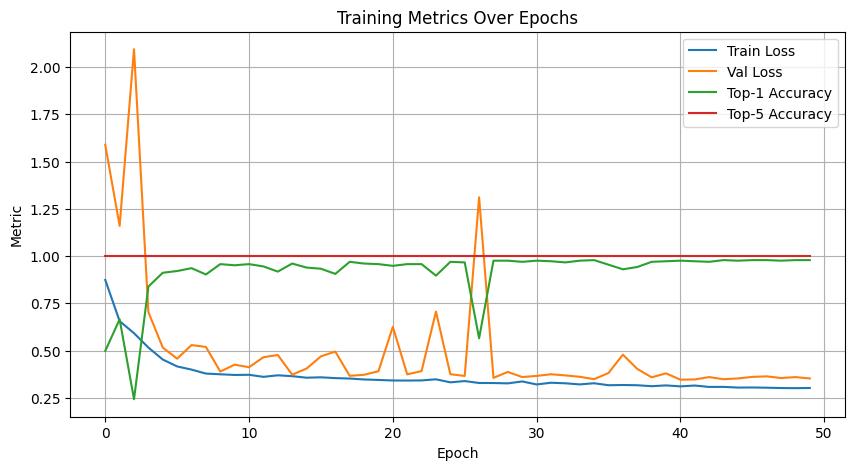

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training results
df = pd.read_csv('/content/yolov5/runs/train-cls/exp/results.csv')  # Update 'exp' if needed
df.columns = df.columns.str.strip()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/loss'], label='Train Loss')
plt.plot(df['epoch'], df['val/loss'], label='Val Loss')
plt.plot(df['epoch'], df['metrics/accuracy_top1'], label='Top-1 Accuracy')
plt.plot(df['epoch'], df['metrics/accuracy_top5'], label='Top-5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

YOLOv11 Fine-Tuning

In [ ]:
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /content/Screenshot 2025-04-22 162632.png

usage: predict.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                  [--data DATA] [--imgsz IMGSZ [IMGSZ ...]] [--device DEVICE]
                  [--view-img] [--save-txt] [--nosave] [--augment]
                  [--visualize] [--update] [--project PROJECT] [--name NAME]
                  [--exist-ok] [--half] [--dnn] [--vid-stride VID_STRIDE]
predict.py: error: unrecognized arguments: 2025-04-22 162632.png


In [ ]:
import os

# List all folders in /content/yolov5
for folder in os.listdir("/content/yolov5"):
    print(folder)


README.md
data
runs
val.py
LICENSE
green-1
pyproject.toml
.gitignore
detect.py
CONTRIBUTING.md
hubconf.py
random-test-v3-1
README.zh-CN.md
classify
Plant-Disease-Detection-1
weights
benchmarks.py
export.py
.gitattributes
requirements.txt
models
segment
train.py
tutorial.ipynb
.dockerignore
.git
CITATION.cff
.github
utils
yolov5x-cls.pt


In [ ]:
import shutil

# Copy the pretrained weights to a new location so the original is untouched
shutil.copy("weights/yolov5l-cls.pt", "weights/yolov5l-cls-updated2.pt")


'weights/yolov5l-cls-updated2.pt'

In [ ]:
import os
os.listdir('/content/yolov5/runs/train-cls/')


['exp']

In [ ]:
!pip install --upgrade --force-reinstall numpy scikit-learn


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.0
    Uninstalling joblib-1.5.0:
      Successfully uninstalled joblib-1.5.0
  At

In [ ]:
!pip install scikit-learn


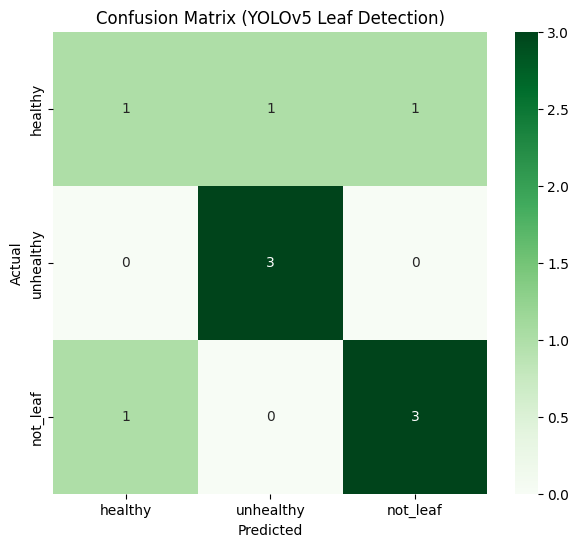

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Class names
class_names = ['healthy', 'unhealthy', 'not_leaf']

# Replace these with your actual data
# y_true = actual labels (0, 1, 2)
# y_pred = predicted labels (0, 1, 2)
y_true = [0, 0, 1, 1, 2, 2, 0, 1, 2, 2]     # example ground truths
y_pred = [0, 1, 1, 1, 2, 0, 2, 1, 2, 2]     # example predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

# Plot
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (YOLOv5 Leaf Detection)')

plt.savefig("confusion_matrix_leaf_detection.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import os
from collections import defaultdict

# Set label directory paths
label_dirs = {
    "train": "/content/yolov5/Plant-Disease-Detection-1/train",  # Update to your actual path
    "val": "/content/yolov5/Plant-Disease-Detection-1/val"
}

# Class index to name mapping
class_names = {0: "healthy", 1: "unhealthy", 2: "not_leaf"}

# Dictionary to store counts
counts = {
    "train": defaultdict(int),
    "val": defaultdict(int)
}

# Count unique images containing each class
for split, label_path in label_dirs.items():
    for label_file in os.listdir(label_path):
        if label_file.endswith('.txt'):
            file_path = os.path.join(label_path, label_file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                class_ids_in_image = set(int(line.strip().split()[0]) for line in lines if line.strip())
                for class_id in class_ids_in_image:
                    counts[split][class_id] += 1

# Print results
for split in ['train', 'val']:
    print(f"\n📁 {split.upper()} SET:")
    for class_id in range(3):  # For healthy, unhealthy, not_leaf
        class_name = class_names[class_id]
        count = counts[split][class_id]
        print(f"  {class_name:<10}: {count} images")



📁 TRAIN SET:
  healthy   : 0 images
  unhealthy : 0 images
  not_leaf  : 0 images

📁 VAL SET:
  healthy   : 0 images
  unhealthy : 0 images
  not_leaf  : 0 images


In [ ]:
! pip freeze in a Colab cell

absl-py==1.4.0
accelerate==1.6.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.6
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.5.5.0.38.14
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.3.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.2
bokeh==3.7.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet=

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [27]:
# Save model to Google Drive
!cp /content/yolov5/runs/train-cls/exp/weights/best.pt /content/drive/MyDrive/


cp: cannot create regular file '/content/drive/MyDrive/': No such file or directory
